# Priors for Bayesian analysis

Astromodels supports the definition of priors for all parameters in
your model. You can use as prior any function (although of course not
all functions should be used this way, but the choice is up to you).

First let’s define a simple model containing one point source (see the
“Model tutorial” for more info):

In [1]:
%%capture
from astromodels import *

# Create a point source named "pts1"
pts1 = PointSource("pts1", ra=125.23, dec=17.98, spectral_shape=Powerlaw())

# Create the model
my_model = Model(pts1)

Now let’s assign uniform priors to the parameters of the powerlaw
function. The function uniform_prior is defined like this:


In [2]:
Uniform_prior.info()

We can use it as such:

In [3]:
# Set 'lower_bound' to 0, 'upper bound' to 10, and leave the 'value' parameter
# to the default value
pts1.spectrum.main.Powerlaw.K.prior = Uniform_prior(lower_bound=0, upper_bound=10)

# Display it
pts1.spectrum.main.Powerlaw.K.display()

Parameter K = 1.0 [1 / (keV s cm2)]
(min_value = 1e-30, max_value = 1000.0, delta = 0.1, free = True) [prior: Uniform_prior]

Now, lets's set a Gaussian prior on the spectral index

In [4]:

pts1.spectrum.main.Powerlaw.index.prior = Gaussian(mu=-2, sigma=1)

pts1.spectrum.main.Powerlaw.index.display()

Parameter index = -2.01 []
(min_value = -10.0, max_value = 10.0, delta = 0.20099999999999998, free = True) [prior: Gaussian]

Text(0, 0.5, 'Prior')

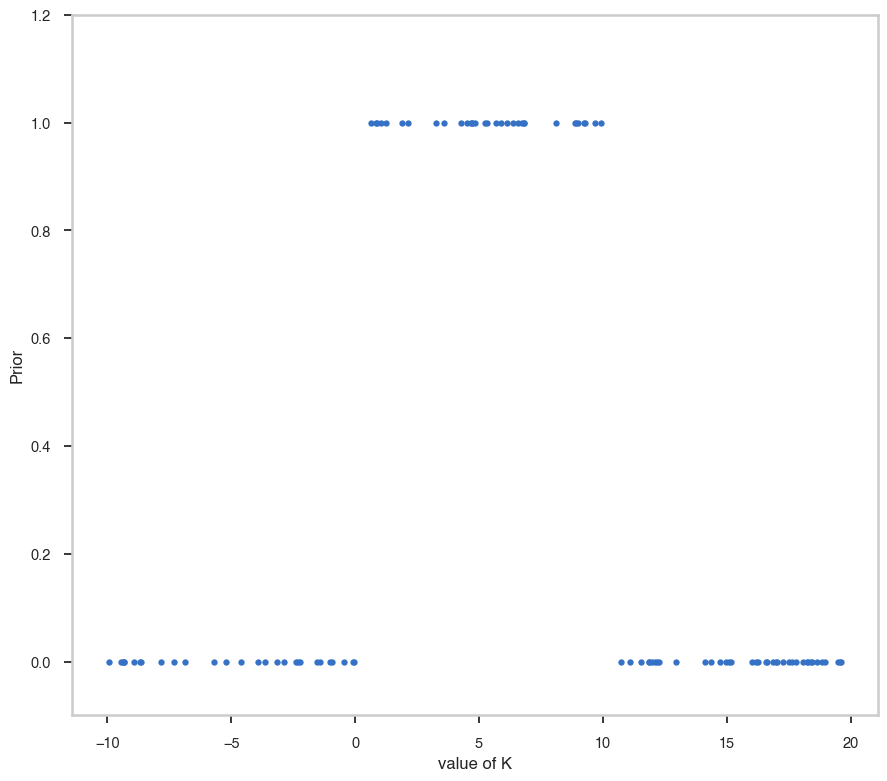

In [5]:
# Let's get 500 points uniformly distributed between -20 and 20
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
from jupyterthemes import jtplot

jtplot.style(context="talk", fscale=1, ticks=True, grid=False)


random_points = np.random.uniform(-10, 20, 100)

fig, ax = plt.subplots()

ax.plot(random_points, pts1.spectrum.main.Powerlaw.K.prior(random_points), ".")

ax.set_ylim([-0.1, 1.2])
ax.set_xlabel("value of K")
ax.set_ylabel("Prior")

Text(0, 0.5, 'Prior')

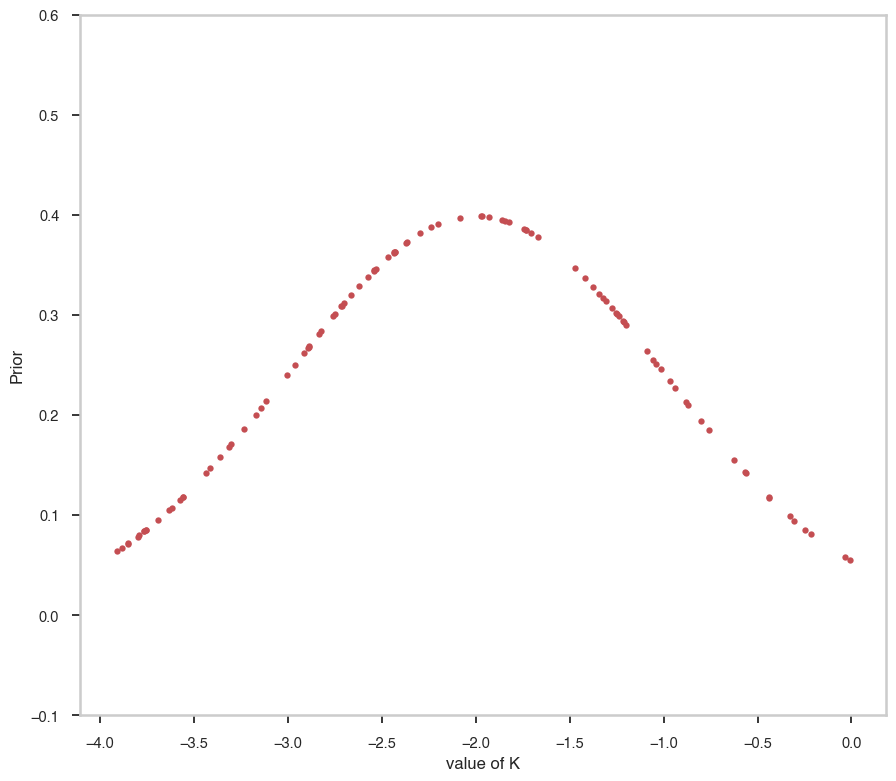

In [6]:
random_points = np.random.uniform(-4, 0, 100)

fig, ax = plt.subplots()

ax.plot(random_points, pts1.spectrum.main.Powerlaw.index.prior(random_points), "r.")

ax.set_ylim([-0.1, 0.6])
ax.set_xlabel("value of K")
ax.set_ylabel("Prior")